In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import stft

In [2]:
file_name = "4_57/Rating.csv"

rating_data = pd.read_csv(file_name)

In [3]:

rating_data.drop("TimeStamp", axis=1, inplace=True)

In [4]:
# rating_data.head()
freq_count = rating_data['Rating'].value_counts().to_dict()

In [18]:
def openDataSet(file_name=None):

    if file_name == None:
        print("Give proper file name")
        return
    
    rating_data = pd.read_csv(file_name)
    rating_data.drop("TimeStamp", axis=1, inplace=True)

    return rating_data

In [21]:
# freq_count

def plotBarRating(rating_data, driver_name):

    freq_count = rating_data['Rating'].value_counts().to_dict()

    numbers = list(freq_count.keys())
    values = list(freq_count.values())

    plt.bar(numbers, values)

    plt.xlabel("Ratings")
    plt.ylabel("Frequency")

    plt.title(f"Rating of Driver {driver_name}")


    for i, count in enumerate(values):
        plt.text(numbers[i], count, str(count), ha='center', va='bottom')

    plt.show()

In [14]:
def plotSpectroRating(rating_data, driver_name):
    fs = 1 / (rating_data['Time'][1] - rating_data['Time'][0])  
    T = rating_data['Time'].max() - rating_data['Time'].min()  

    # Perform Short-Time Fourier Transform (STFT)
    f, t, Zxx = stft(rating_data['Rating'], fs=fs)

    # Plot the spectrogram
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.colorbar(label='Magnitude')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title(f'Spectrogram for driver {driver_name}')
    plt.show()


    # Plot the spectrogram with different shading
    plt.pcolormesh(t, f, np.abs(Zxx), shading='auto')  # Change 'shading' to 'flat' for a different style
    plt.colorbar(label='Magnitude')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title(f'Spectrogram with Flat Shading driver {driver_name}')
    plt.show()

In [20]:
rating_data_driver_1 = openDataSet("4_57/Rating.csv")
rating_data_driver_2 = openDataSet("5_11/Rating.csv")

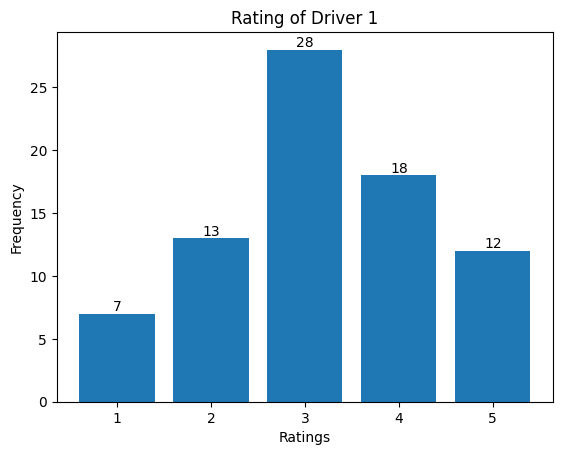

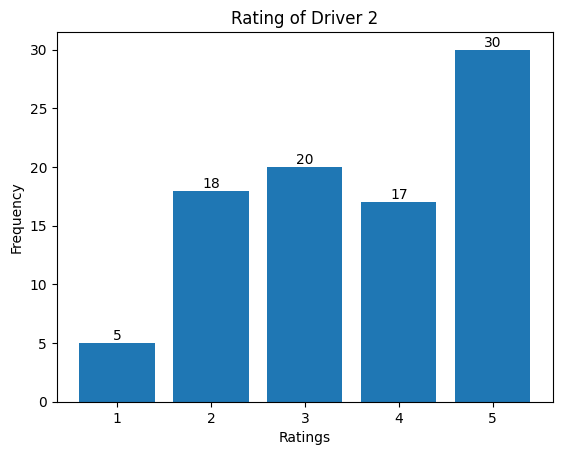

In [24]:
plotBarRating(rating_data_driver_1, 1)
plotBarRating(rating_data_driver_2, 2)

c:\Users\Yaman Sahu\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 78, using nperseg = 78
  warnings.warn('nperseg = {0:d} is greater than input length '


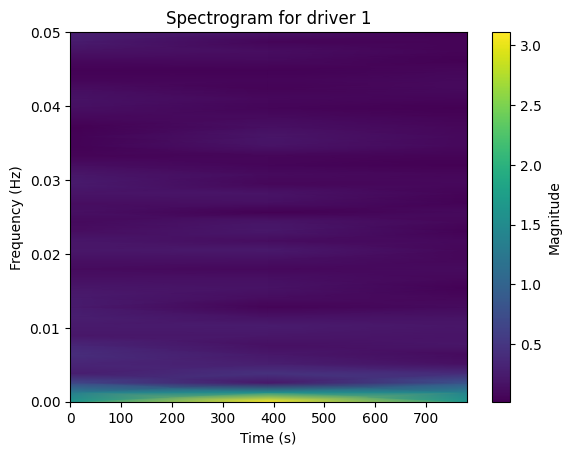

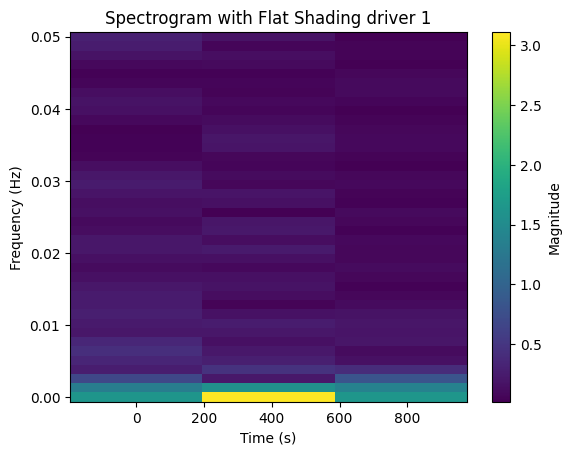

c:\Users\Yaman Sahu\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 90, using nperseg = 90
  warnings.warn('nperseg = {0:d} is greater than input length '


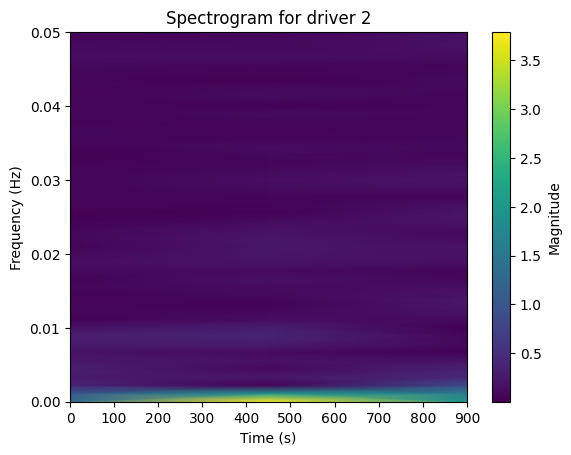

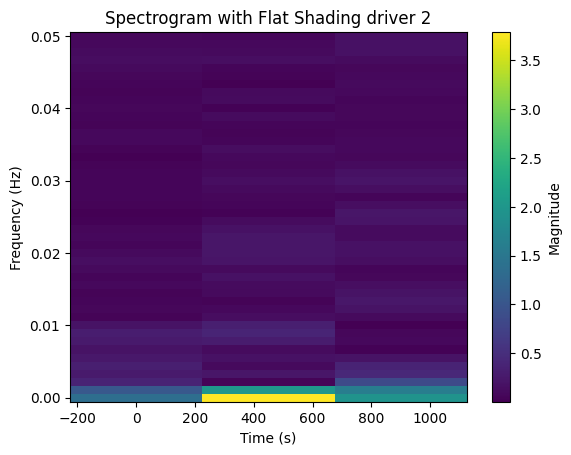

In [25]:
plotSpectroRating(rating_data_driver_1, 1)
plotSpectroRating(rating_data_driver_2, 2)